In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

# Load BTC price data
df = pd.read_csv('../data/btc_price.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

In [2]:
# Preview data
print("Head of BTC Data:")
display(df.head())

Head of BTC Data:


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008


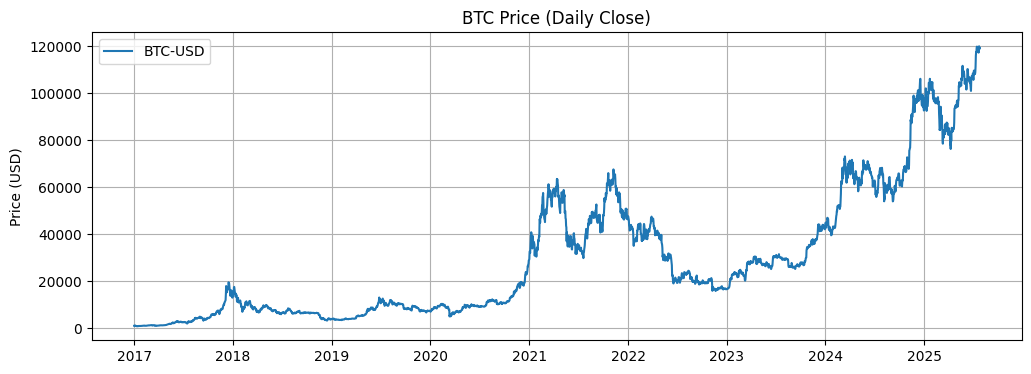

In [3]:
# Plot BTC Price
plot.figure(figsize=(12, 4))
plot.plot(df['Close'], label='BTC-USD')
plot.title("BTC Price (Daily Close)")
plot.ylabel("Price (USD)")
plot.grid(True)
plot.legend()
plot.show()

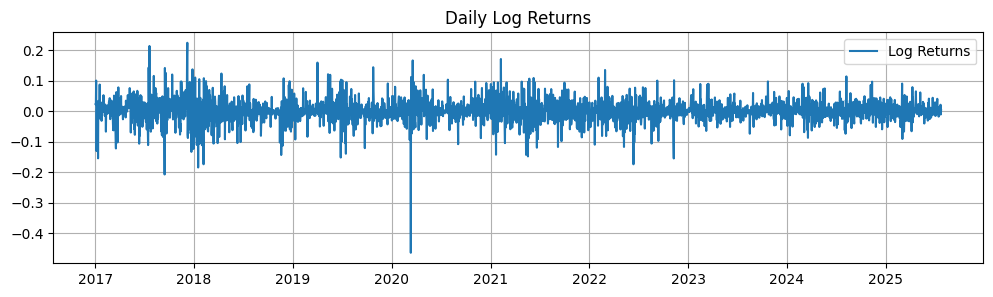

In [4]:
# Calculate log returns
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))

# Plot log returns
plot.figure(figsize=(12, 3))
plot.plot(df['log_return'], label='Log Returns')
plot.title("Daily Log Returns")
plot.grid(True)
plot.legend()
plot.show()

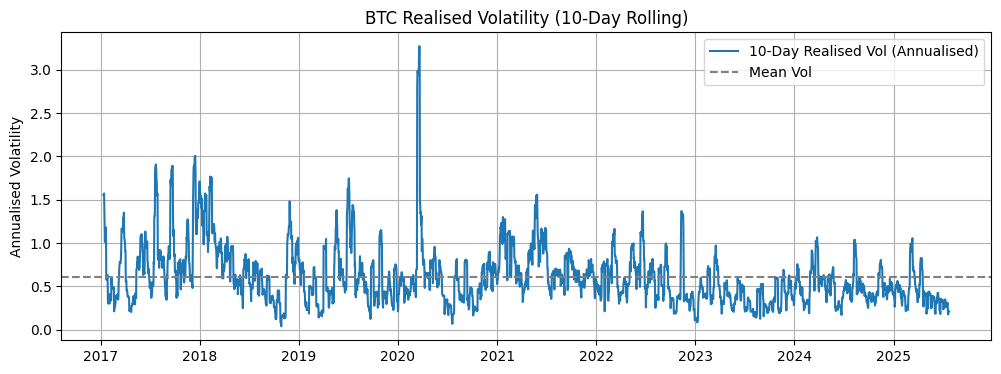

In [5]:
# Calculate 10-day rolling realised volatility (annualised)
df['realised_vol_10d'] = df['log_return'].rolling(window=10).std() * np.sqrt(365)

# 📊 Plot realised volatility
plot.figure(figsize=(12, 4))
plot.plot(df['realised_vol_10d'], label='10-Day Realised Vol (Annualised)')
plot.axhline(y=df['realised_vol_10d'].mean(), color='gray', linestyle='--', label='Mean Vol')
plot.title("BTC Realised Volatility (10-Day Rolling)")
plot.ylabel("Annualised Volatility")
plot.grid(True)
plot.legend()
plot.show()

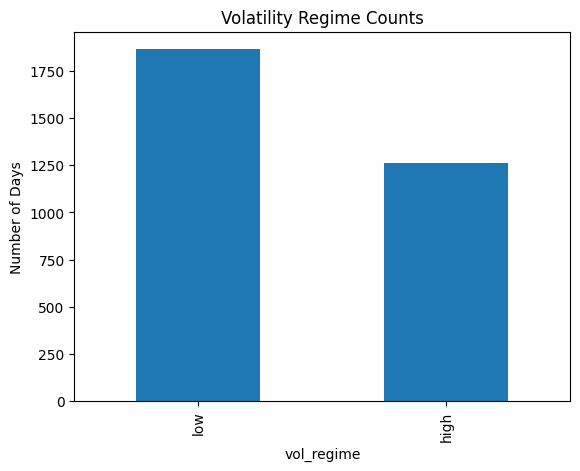

In [6]:
# Create volatility regime (high/low)
vol_mean = df['realised_vol_10d'].mean()
df['vol_regime'] = np.where(df['realised_vol_10d'] > vol_mean, 'high', 'low')
# Regime histogram
df['vol_regime'].value_counts().plot(kind='bar', title='Volatility Regime Counts')
plot.ylabel("Number of Days")
plot.show()

In [7]:
# Save enriched dataset
df.to_csv('../data/btc_price_enriched.csv')